# Исследование закономерностей определяющих успешность игры

**Описание проекта:**

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».




**Инструкция по выполнению проекта:**

Шаг 1. Откройте файл с данными и изучите общую информацию

Шаг 2. Подготовьте данные

   - Замените названия столбцов (приведите к нижнему регистру);
   - Преобразуйте данные в нужные типы. Опишите, в каких столбцах заменили тип данных и почему;
   - Обработайте пропуски при необходимости:
      
       - Объясните, почему заполнили пропуски определённым образом или почему не стали это делать;
       - Опишите причины, которые могли привести к пропускам;
       - Обратите внимание на аббревиатуру 'tbd' в столбце с оценкой пользователей. Отдельно разберите это значение и опишите, как его обработать;
    Посчитайте суммарные продажи во всех регионах и запишите их в отдельный столбец.

Шаг 3. Проведите исследовательский анализ данных

   - Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?
   - Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?
   - Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.
   - Не учитывайте в работе данные за предыдущие годы.
   - Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.
   - Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.
   - Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.
   - Соотнесите выводы с продажами игр на других платформах.
   - Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

Шаг 4. Составьте портрет пользователя каждого региона
Определите для пользователя каждого региона (NA, EU, JP):

   - Самые популярные платформы (топ-5). Опишите различия в долях продаж.
   - Самые популярные жанры (топ-5). Поясните разницу.
   - Влияет ли рейтинг ESRB на продажи в отдельном регионе?

Шаг 5. Проверьте гипотезы

   - Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
   - Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Задайте самостоятельно пороговое значение alpha.
Поясните:

   - Как вы сформулировали нулевую и альтернативную гипотезы;
   - Какой критерий применили для проверки гипотез и почему.

Шаг 6. Напишите общий вывод

## Открываем и изучаем данные

In [1]:
import pandas as pd
pd.options.display.max_columns = 1000

from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
import numpy as np

In [2]:
data = pd.read_csv('datasets/games.csv')

In [3]:
data.head(30)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


**Описание данных**

    Name — название игры
    Platform — платформа
    Year_of_Release — год выпуска
    Genre — жанр игры
    NA_sales — продажи в Северной Америке (миллионы проданных копий)
    EU_sales — продажи в Европе (миллионы проданных копий)
    JP_sales — продажи в Японии (миллионы проданных копий)
    Other_sales — продажи в других странах (миллионы проданных копий)
    Critic_Score — оценка критиков (максимум 100)
    User_Score — оценка пользователей (максимум 10)
    Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [5]:
data.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


<div style="border:solid green 2px; padding: 20px">

**Комментарии:** хорошие данные, только надо немного обработать. Есть пропуски в некоторых столбцах, которые нечем заполнить, но это не помешает исследованию.

## Обработка данных

### Приведем название столбцов к нижнему регистру

In [6]:
data.columns = data.columns.str.lower()

In [7]:
data.head(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


### Обработаем пропуски и дубликаты

In [8]:
data.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

#### Удалим строки с пропусками в столбцах `genre` - `жанр игры` и `year_of_release` - `год выпуска игры`

In [9]:
data = data.dropna(subset=['genre', 'year_of_release']).reset_index(drop=True)

In [10]:
data.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         6605
rating             6676
dtype: int64

<div style="border:solid green 2px; padding: 20px">

**Комментарии:** в столбце `genre` было всего 2а пропуска, а в столбце `year_of_release` 269ть пропусков, это меньше чем 2% (процента) от всех данных, т.к. заполнять данные пропуски совсем не понятно чем, проще было эти строки удалить! С удалением этих пропусков, так же удалились 2а пропуска в столбце `name` - `название игр`.

#### Заменим в столбце `rating` - `рейтинг от организации ESRB` пропуски на строку `unknown`

In [11]:
data.rating = data.rating.fillna('Unknown')

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16444 entries, 0 to 16443
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       9839 non-null   object 
 10  rating           16444 non-null  object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


<div style="border:solid green 2px; padding: 20px">

**Комментарий:** заменили пропуски на строку 'unknown' чтобы не отбрасывать все пропуски из анализа. Если пропуски имеют не случайную природу, можно будет обнаружить какую-нибудь зависимость

#### Заменим в столбце `user_score` - `оценка пользователей` значения `tbd` на `NaN`

In [13]:
data.user_score = data['user_score'].replace('tbd', np.nan)

<div style="border:solid green 2px; padding: 20px">

**Комментарий:** значени `tbd` в столбце означает - `"не определено"`, поэтому логичнее будет его заменить на `NaN`.

<div style="border:solid blue 2px; padding: 20px">
    
**Комментарий:** в столбцах `critic_score`-`"оценка критиков"`, `user_score`-`"оценка пользователей"` заполнять пропуски не будем. Т.к. заполнить каким-то значением средним или медианой будет не корректно, испортим данные и навредим исследованию.

#### Проверим данные на явные дубликаты

In [14]:
data.duplicated().sum()

0

<div style="border:solid green 2px; padding: 20px">

**Комментарий:** явные дубликаты в данных отсутствуют.

### Преобразуем тип данных

In [15]:
data.year_of_release = data.year_of_release.astype('int')

In [16]:
data.user_score = data.user_score.astype('float')

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16444 entries, 0 to 16443
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           16444 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


<div style="border:solid green 2px; padding: 20px">

**Коментарии:** преобразовали тип данных в столбце `year_of_release` - `год выпуска игры` в целые числа, в столбеце `user_score` - `оценка пользователей` в вещественные.

### Создадим столбец с сумарной продажей игр `sum_sales`


In [18]:
data['sum_sales'] = data[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)

In [19]:
data.head(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,Unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,Unknown,31.38


## Проведем исследовательский анализ данных

### Посмотрим сколько игр выпускалось в разные годы

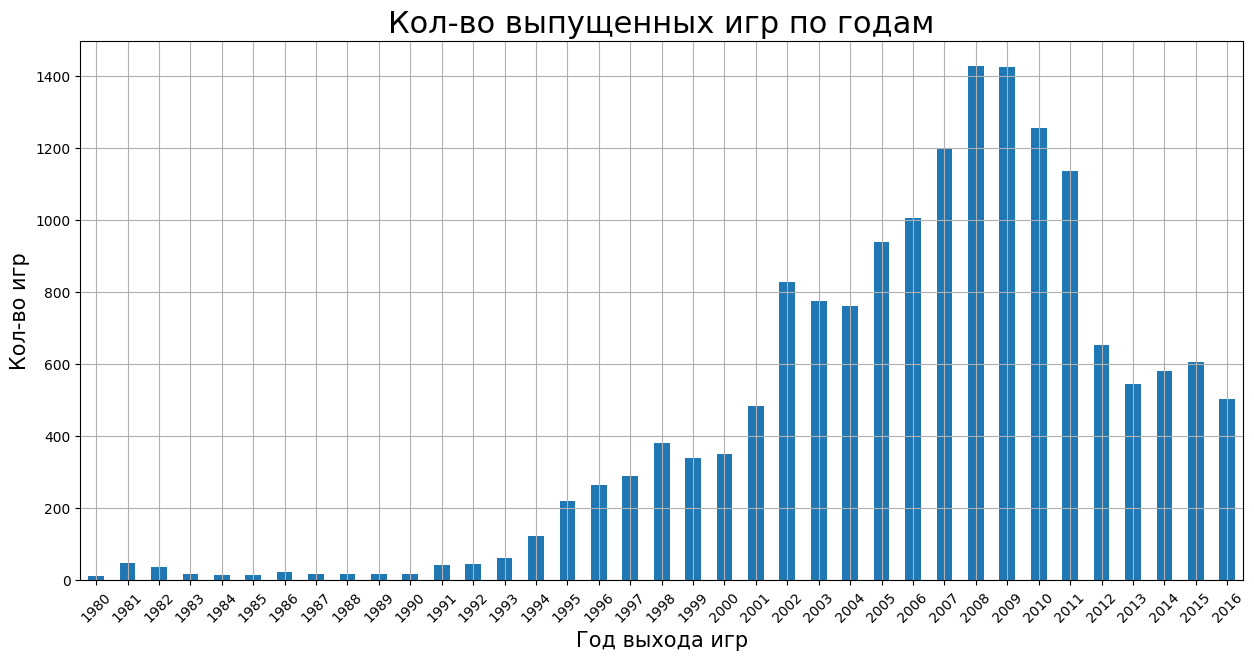

In [20]:
data.groupby('year_of_release')['year_of_release'].count().plot(kind='bar', rot=45, figsize=(15, 7), grid=True)

plt.xlabel('Год выхода игр', fontsize = 15)
plt.ylabel('Кол-во игр', fontsize = 15)
plt.title('Кол-во выпущенных игр по годам',fontsize = 22);

<div style="border:solid green 2px; padding: 20px">

**Комментарий:** до 1994 года выпускалось очень малое количество игр, менне чем 100 игр в год, эти данные в иследовании можно не учитывать.

### Посмотрим как менялись продажи по платформам

,Общее кол-во продаж (миллионы проданых копий)
Игровые платформы,
PS2,1233.56
X360,961.24
PS3,931.34
Wii,891.18
DS,802.76
PS,727.58
PS4,314.14
GBA,312.88
PSP,289.53


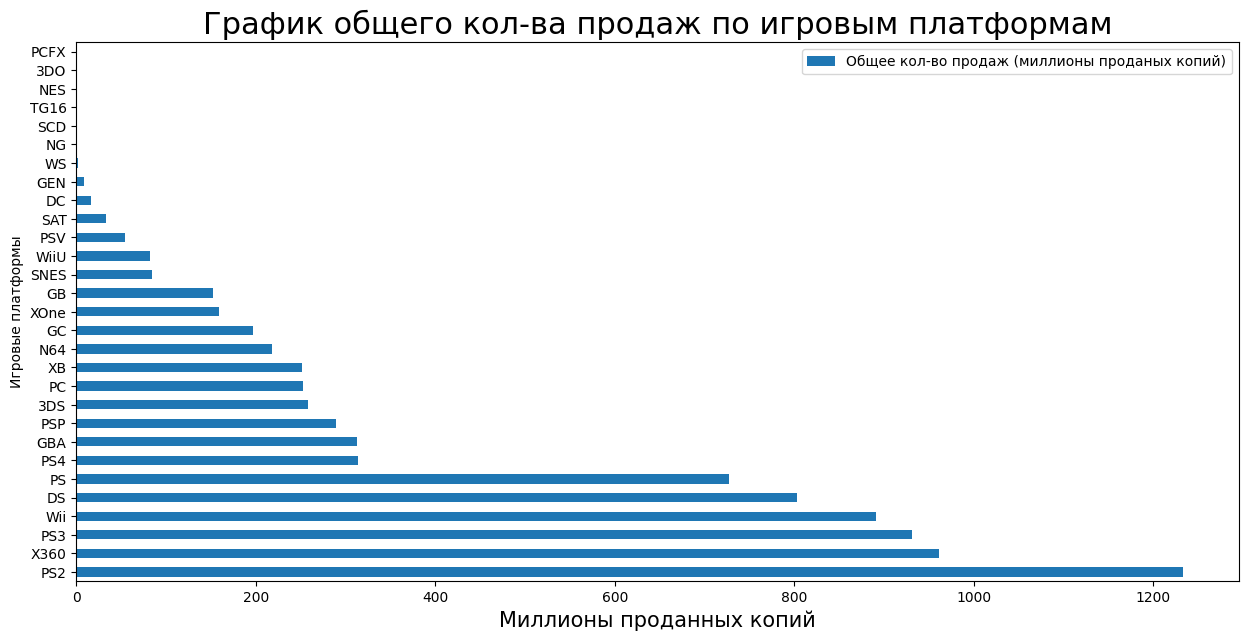

In [21]:
platform_year = data[data['year_of_release'] > 1993]\
                    .groupby('platform').agg({'sum_sales': 'sum'})\
                    .sort_values(by='sum_sales', ascending=False)

n_platform = platform_year.copy()

platform_year.columns = ['Общее кол-во продаж (миллионы проданых копий)']
platform_year.index.names = ['Игровые платформы']

platform_year.plot(kind='barh', figsize=(15,7))
plt.xlabel('Миллионы проданных копий', fontsize = 15)
plt.title('График общего кол-ва продаж по игровым платформам', fontsize = 22)

platform_year

<div style="border:solid green 2px; padding: 20px">

**Комментарий:** возьмем для исследования платформы с общими продажами более 100 миллионов проданных копий.

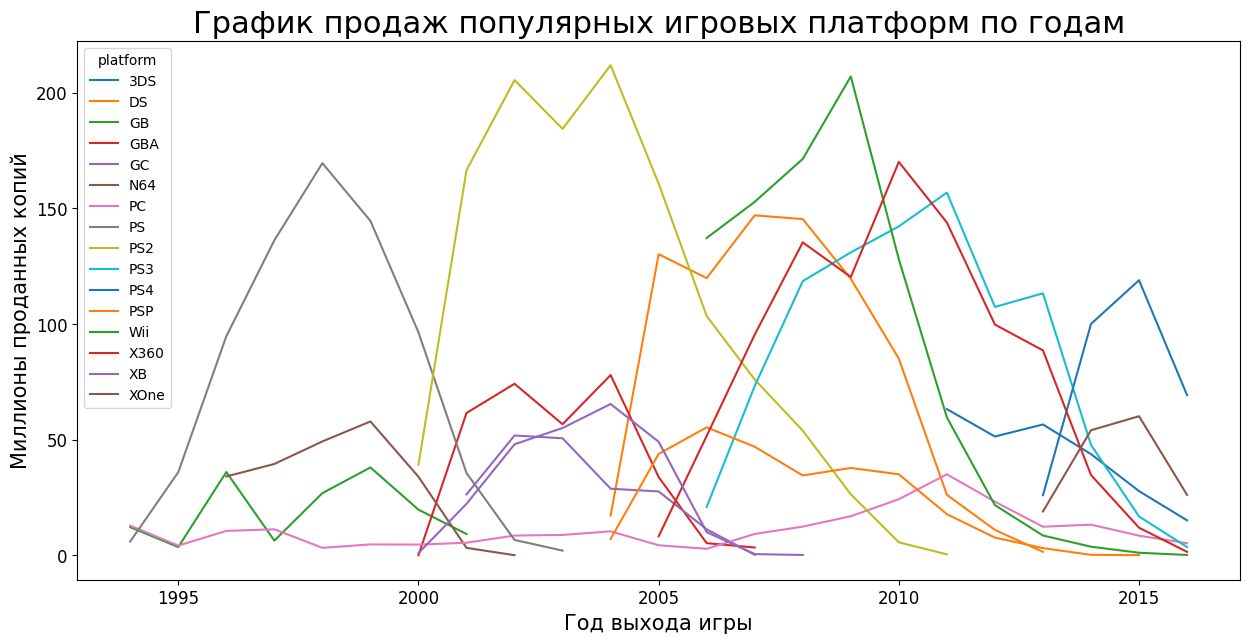

In [22]:
n_platform = n_platform[n_platform['sum_sales'] > 100]

n_year = data.query('(platform in @n_platform.index) and (year_of_release > 1993)')\
         .pivot_table(index='year_of_release', columns='platform', values='sum_sales', aggfunc='sum')

n_year.plot(figsize=(15,7), fontsize = 12)
plt.xlabel('Год выхода игры', fontsize = 15)
plt.ylabel('Миллионы проданных копий', fontsize = 15)
plt.title('График продаж популярных игровых платформ по годам', fontsize = 22);

<div style="border:solid green 2px; padding: 20px">

**Комментарий:** судя по графику игровые платформы существуют около `7ти` лет, за исключинем некоторых гигантов как `PS, PS2, PS3, GB, GBA и DS` актуальность которых более `10ти` лет. Но есть и долгожитель, платформа `PC` звезд с неба не хватает, но существует на всем периоде `от 1994 года по 2016 год` со средними продажами не более `10 миллионов копий` в год, но есть и скачек в `2011` году продажи поднялись до `50 миллионов копий`.

### Определим `актуальный период`

In [23]:
actual = data[data['year_of_release'] >= 2014].reset_index(drop=True)

In [24]:
actual

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
0,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,Unknown,14.63
1,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
2,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,Unknown,11.68
3,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
4,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,Unknown,7.98
...,...,...,...,...,...,...,...,...,...,...,...,...
1684,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,Unknown,0.01
1685,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,NaN,NaN,Unknown,0.01
1686,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,Unknown,0.01
1687,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,Unknown,0.01


<div style="border:solid green 2px; padding: 20px">

**Комментарий:** `актуальным периодом` будем считать данные за последние `2.5 года с 2014 по 2016 годы`, т.к. в этот период выпускается примерно одинаковое кол-во игр в год, в него попадают актуальные платформы и нет больших скачков в продажах.

### Посмотим какие платформы лидируют по продажам, рост и падение. Выберем несколько потенциально прибыльных платформ.

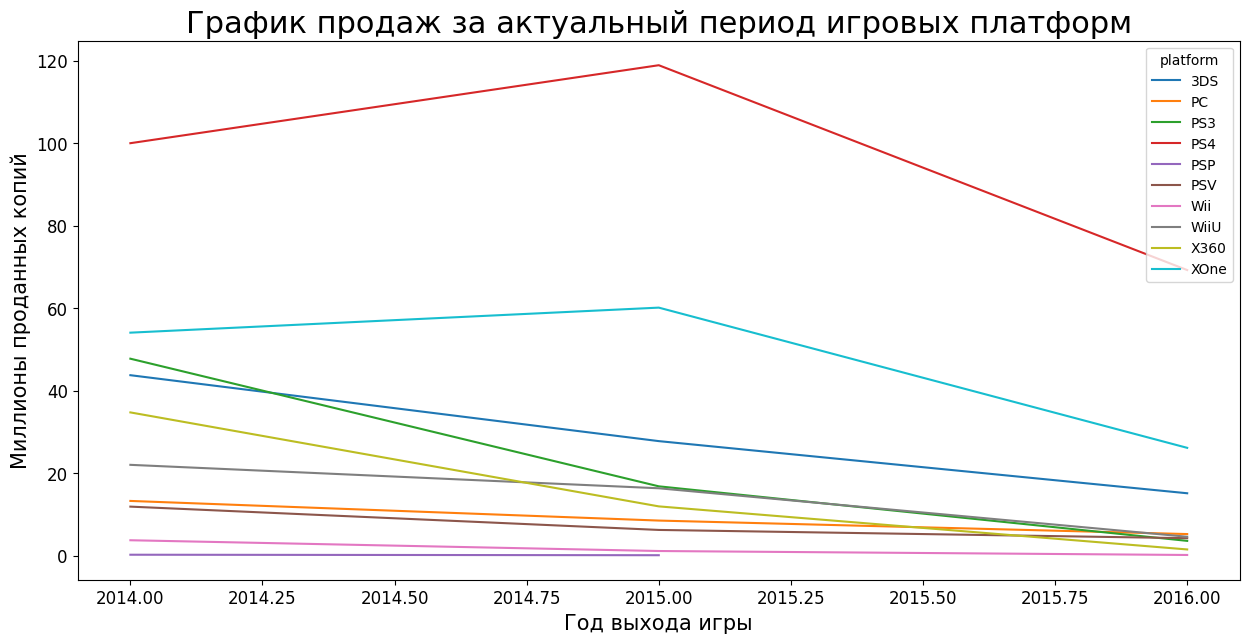

In [25]:
actual.pivot_table(index='year_of_release', columns='platform', values='sum_sales', aggfunc='sum')\
      .plot(figsize=(15, 7), fontsize = 12)

plt.xlabel('Год выхода игры', fontsize = 15)
plt.ylabel('Миллионы проданных копий', fontsize = 15)
plt.title('График продаж за актуальный период игровых платформ', fontsize = 22);

<div style="border:solid green 2px; padding: 20px">

**Комментарий:** лидер продаж в этом периоди `PS4` с пиковым показателем продаж около `120ти миллионов копий` в год. Платформа `XOne` имеет второй показатель продаж около `60ти миллионов` копий. `PS3, 3DS и Х360` имеют тоже хорошие показатели около `40ка миллионов` копий в год с небольшим падением. После `2015` года все платформы падают в прадажах, особенно это сказывается на лидерах рынка.
    
Считаем `PS4 и XOne` потенциально прибыльными платформами, т.к. они вышли в `2013` году и судя по их предшественникам должны просуществовать более 10 лет.  

### Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам

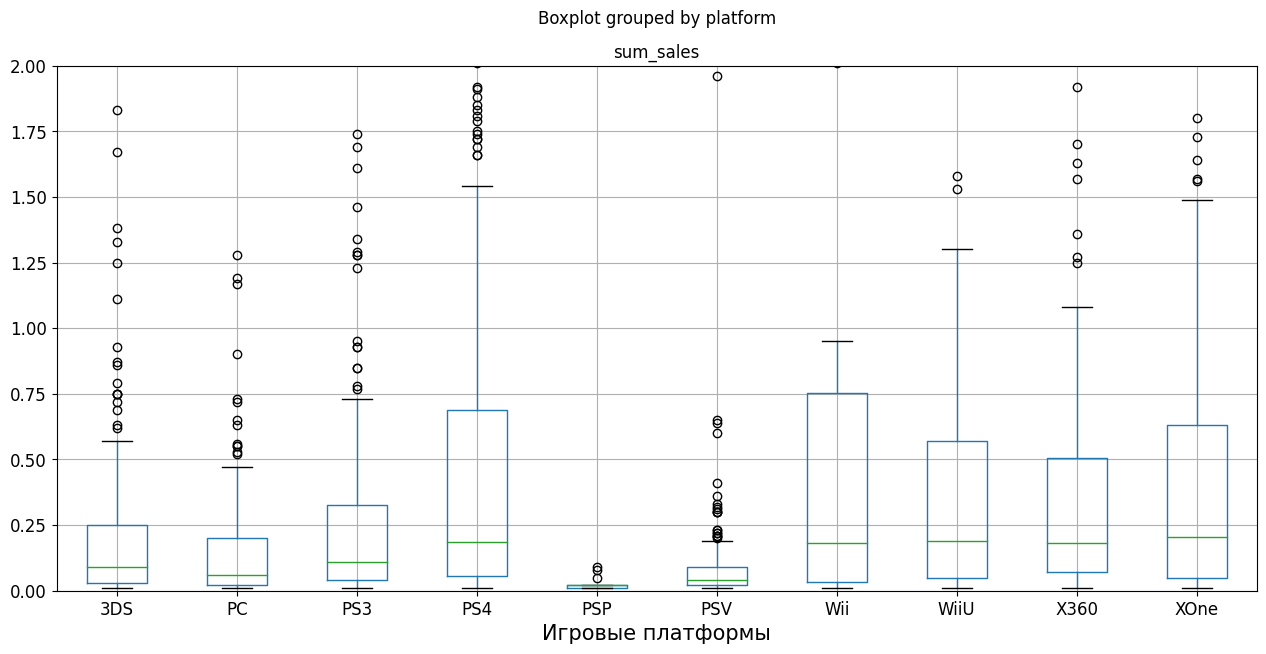

In [26]:
actual.boxplot(column='sum_sales', by='platform', fontsize = 12, figsize=(15,7))
plt.ylim(0, 2)
plt.xlabel('Игровые платформы', fontsize = 15);

<div style="border:solid green 2px; padding: 20px">

**Комментарий:** по графику медианные продажи платформ PS4, Wii, WiiU, X360 и XOne практически одинаковы, что около 200т тысяч проданных копий, хотя PS4 по верхней границе превосходит остальные по кол-ву проданных копий более 1.5ра миллионов и с выбросами ещё выше. 

### Посмотрим, как влияют на продажи внутри платформы PS4 отзывы пользователей и критиков, построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами

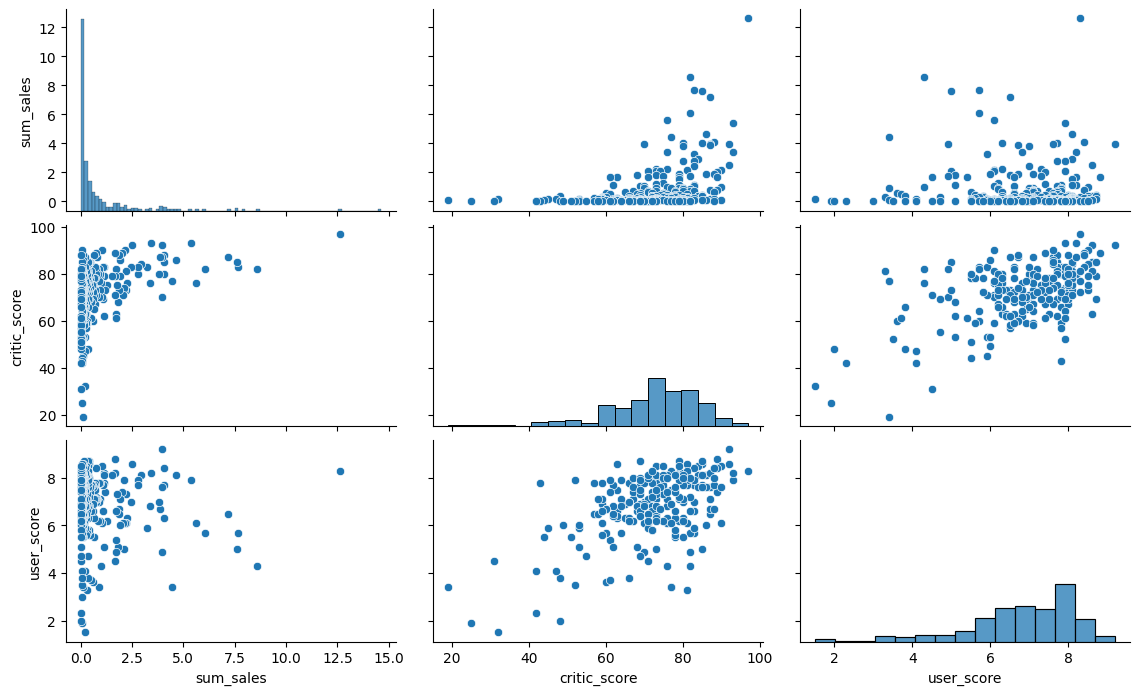

In [27]:
ps4 = actual[actual['platform'] == 'PS4']

sns.pairplot(ps4[['sum_sales', 'critic_score', 'user_score']])
plt.gcf().set_size_inches(12,7);

In [28]:
critic_corr = ps4.critic_score.corr(ps4.sum_sales)
user_corr = ps4.user_score.corr(ps4.sum_sales)

/opt/anaconda3/envs/practicum/lib/python3.9/site-packages/pandas/plotting/_matplotlib/core.py:1041: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


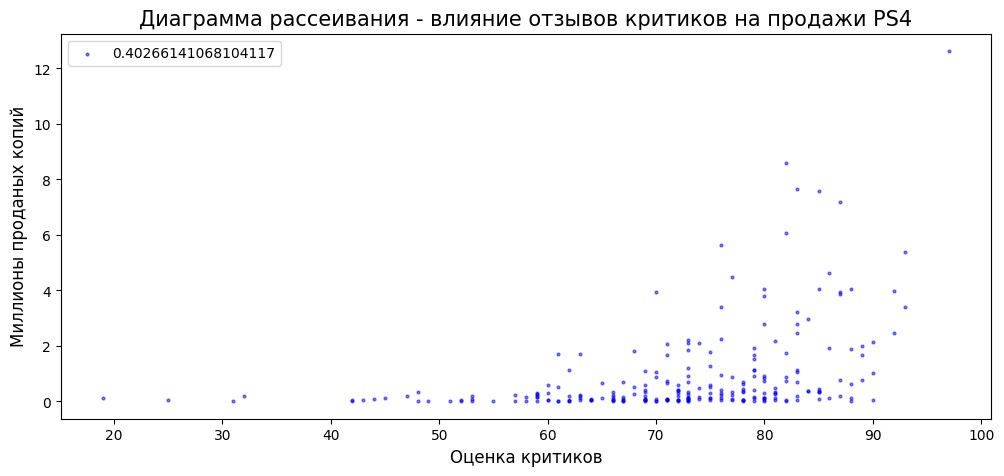

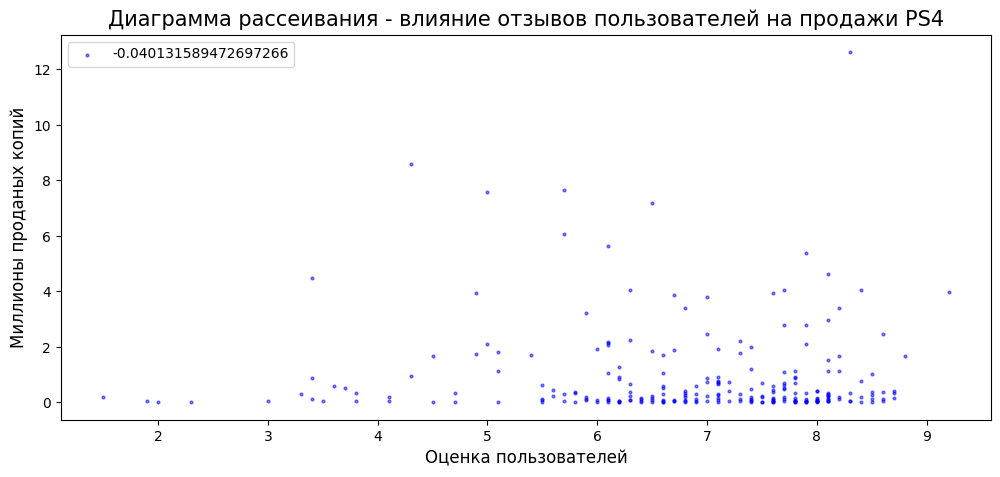

In [29]:
ps4.plot(kind='scatter', y='sum_sales' , x='critic_score', alpha=0.5,\
         subplots=True, figsize=(12,5), c = 'b', s = 4)
plt.legend(labels=[critic_corr])
plt.title('Диаграмма рассеивания - влияние отзывов критиков на продажи PS4', fontsize = 15);
plt.xlabel('Оценка критиков', fontsize = 12)
plt.ylabel('Миллионы проданых копий', fontsize = 12);

ps4.plot(kind='scatter', y='sum_sales' , x='user_score', alpha=0.5,\
         subplots=True, figsize=(12,5), c = 'b', s = 4)
plt.legend(labels=[user_corr])
plt.title('Диаграмма рассеивания - влияние отзывов пользователей на продажи PS4', fontsize = 15);
plt.xlabel('Оценка пользователей', fontsize = 12)
plt.ylabel('Миллионы проданых копий', fontsize = 12);

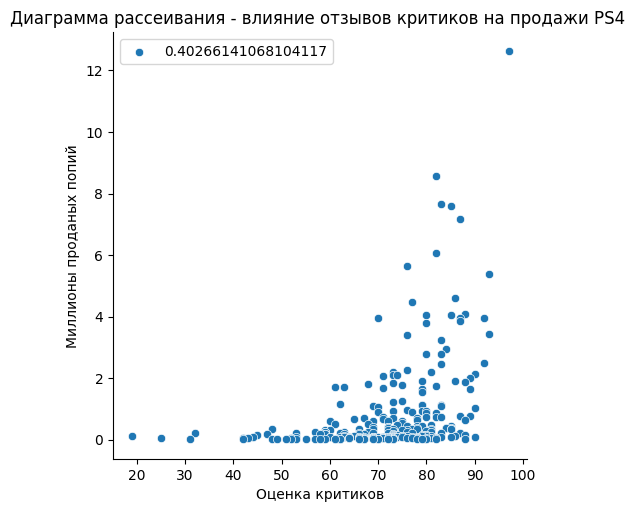

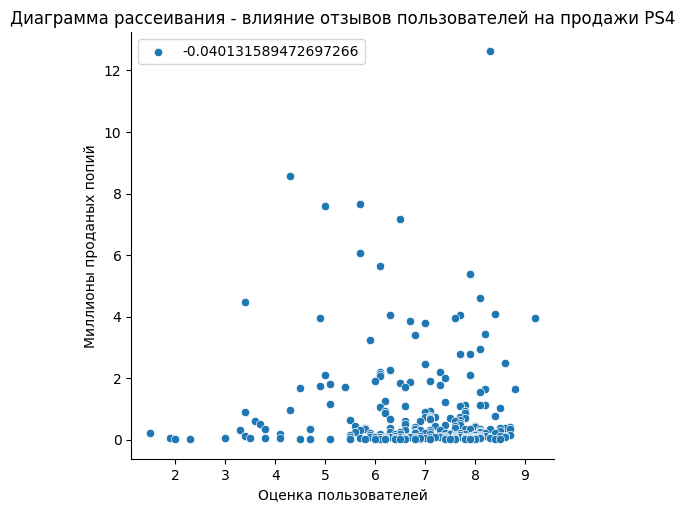

In [30]:
sns.relplot(ps4, x='critic_score', y='sum_sales')
plt.legend(labels=[critic_corr])
plt.xlabel('Оценка критиков')
plt.ylabel('Миллионы проданых попий')
plt.title('Диаграмма рассеивания - влияние отзывов критиков на продажи PS4 ');

sns.relplot(ps4, x='user_score', y='sum_sales')
plt.legend(labels=[user_corr])
plt.xlabel('Оценка пользователей')
plt.ylabel('Миллионы проданых попий')
plt.title('Диаграмма рассеивания - влияние отзывов пользователей на продажи PS4');

<div style="border:solid green 2px; padding: 20px">

**Комментарий:** по диаграммам можно судуть следующие: влияние на продажи от оценки пользователей и критиков имеется, но от оценки пользователей не существенное за исключением некоторых выбросов. А вот влияние мнение критиков на потребителей действует намного лучше. Это хорошо заметно по `коэффициэнту корреляции`.

### Соотнесем выводы с продажами игр на других платформах

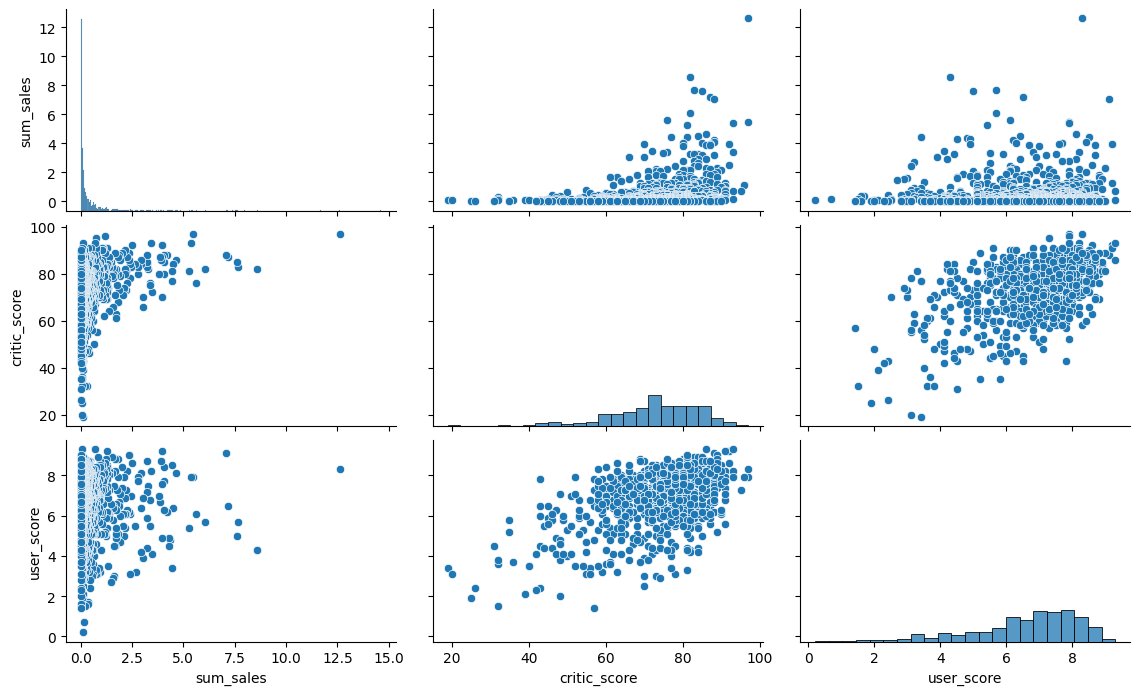

In [31]:
sns.pairplot(actual[['sum_sales', 'critic_score', 'user_score']])
plt.gcf().set_size_inches(12,7);

In [32]:
critic_corr = actual.critic_score.corr(actual.sum_sales)
user_corr = actual.user_score.corr(actual.sum_sales)

/opt/anaconda3/envs/practicum/lib/python3.9/site-packages/pandas/plotting/_matplotlib/core.py:1041: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


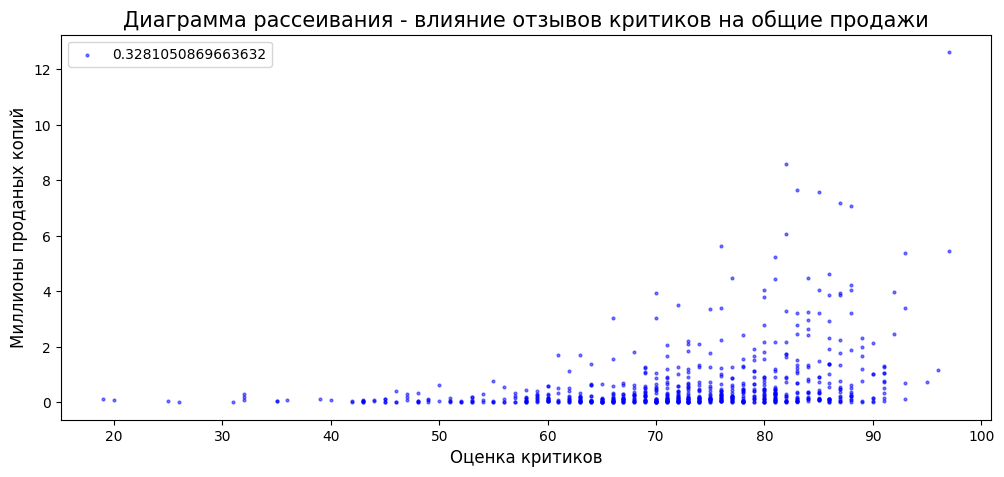

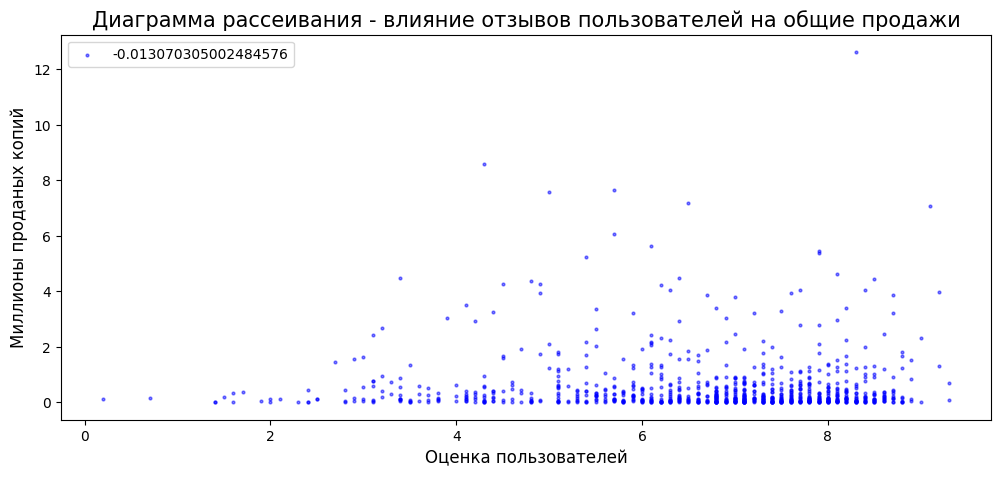

In [33]:
actual.plot(kind='scatter', y='sum_sales' , x='critic_score', alpha=0.5,\
            subplots=True, figsize=(12,5), c = 'b', s = 4)
plt.legend(labels=[critic_corr])
plt.title('Диаграмма рассеивания - влияние отзывов критиков на общие продажи', fontsize = 15);
plt.xlabel('Оценка критиков', fontsize = 12)
plt.ylabel('Миллионы проданых копий', fontsize = 12);

actual.plot(kind='scatter', y='sum_sales' , x='user_score', alpha=0.5,\
            subplots=True, figsize=(12,5), c = 'b', s = 4)
plt.legend(labels=[user_corr])
plt.title('Диаграмма рассеивания - влияние отзывов пользователей на общие продажи', fontsize = 15);
plt.xlabel('Оценка пользователей', fontsize = 12)
plt.ylabel('Миллионы проданых копий', fontsize = 12);

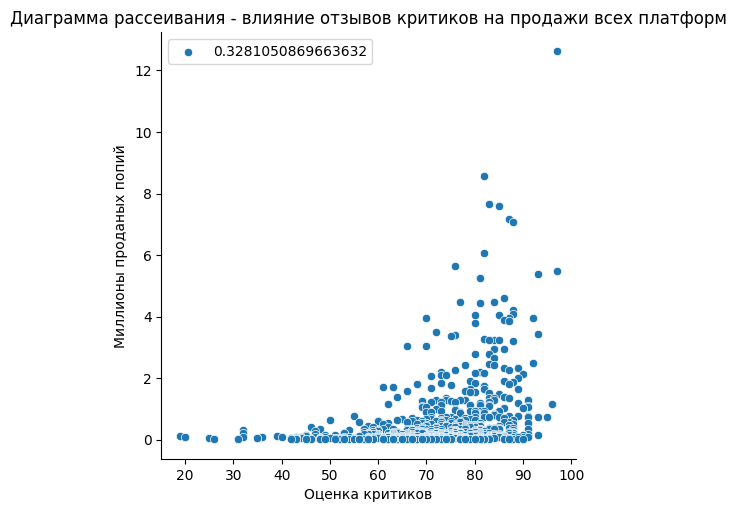

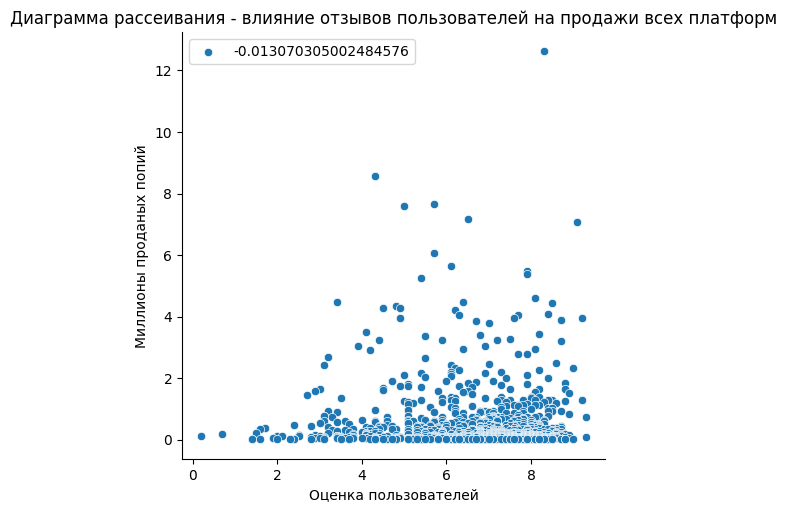

In [34]:
sns.relplot(actual, x='critic_score', y='sum_sales')
plt.legend(labels=[critic_corr])
plt.xlabel('Оценка критиков')
plt.ylabel('Миллионы проданых попий')
plt.title('Диаграмма рассеивания - влияние отзывов критиков на продажи всех платформ');

sns.relplot(actual, x='user_score', y='sum_sales')
plt.legend(labels=[user_corr])
plt.xlabel('Оценка пользователей')
plt.ylabel('Миллионы проданых попий')
plt.title('Диаграмма рассеивания - влияние отзывов пользователей на продажи всех платформ');

<div style="border:solid green 2px; padding: 20px">

**Комментарий:** по другим платформам похожий эффект от отзывов, что и по платформе PS4. Немного изменился `коэффициент корреляция`, но не существенно. Так же отзывы критиков положительно влияют на динамику продаж игр.

### Соотнесем выводы о продажами игр с платформой Xone

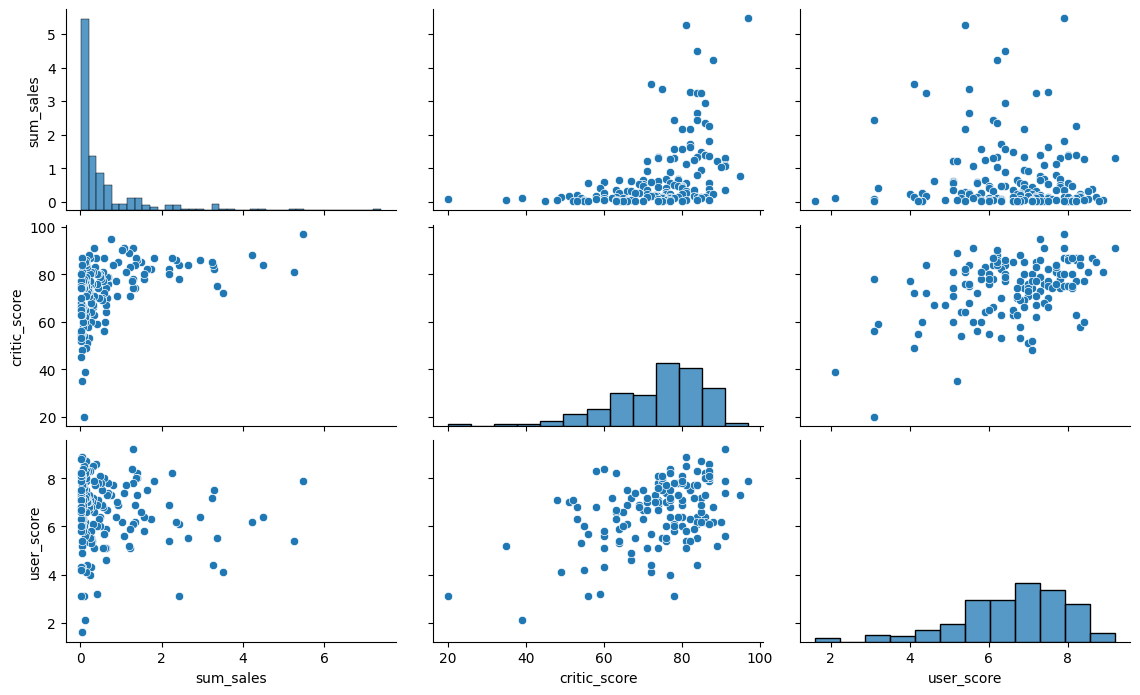

In [35]:
xone = actual[actual['platform'] == 'XOne']

sns.pairplot(xone[['sum_sales', 'critic_score', 'user_score']])
plt.gcf().set_size_inches(12,7);

In [36]:
critic_corr = xone.critic_score.corr(xone.sum_sales)
user_corr = xone.user_score.corr(xone.sum_sales)

/opt/anaconda3/envs/practicum/lib/python3.9/site-packages/pandas/plotting/_matplotlib/core.py:1041: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


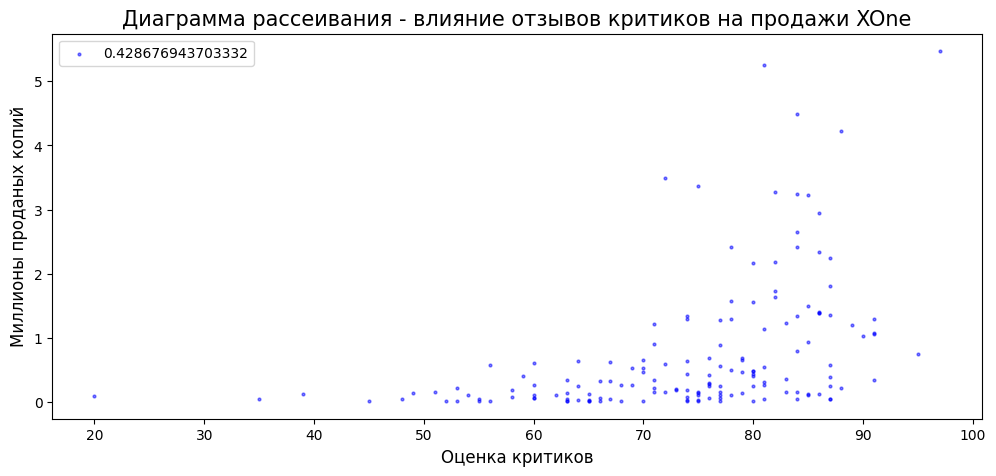

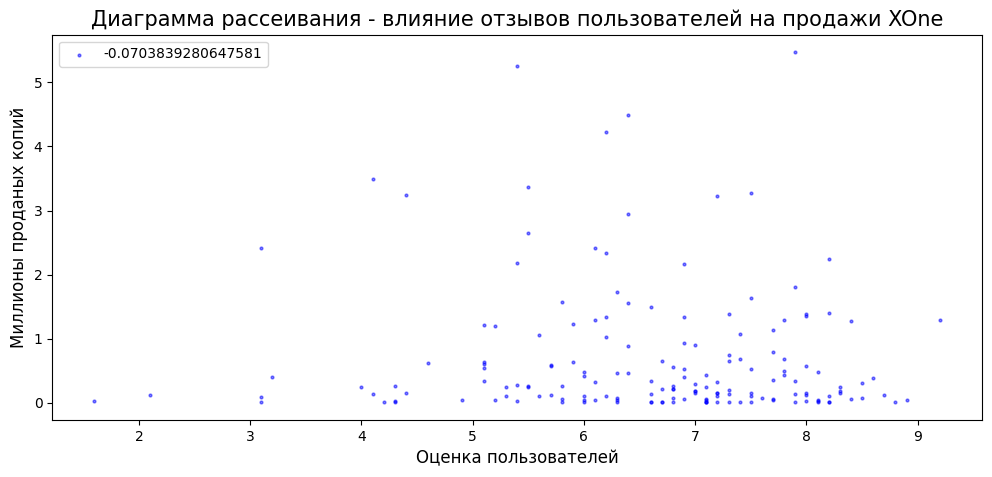

In [37]:
xone.plot(kind='scatter', y='sum_sales' , x='critic_score', alpha=0.5,\
         subplots=True, figsize=(12,5), c = 'b', s = 4)
plt.legend(labels=[critic_corr])
plt.title('Диаграмма рассеивания - влияние отзывов критиков на продажи XOne', fontsize = 15);
plt.xlabel('Оценка критиков', fontsize = 12)
plt.ylabel('Миллионы проданых копий', fontsize = 12);

xone.plot(kind='scatter', y='sum_sales' , x='user_score', alpha=0.5,\
         subplots=True, figsize=(12,5), c = 'b', s = 4)
plt.legend(labels=[user_corr])
plt.title('Диаграмма рассеивания - влияние отзывов пользователей на продажи XOne', fontsize = 15);
plt.xlabel('Оценка пользователей', fontsize = 12)
plt.ylabel('Миллионы проданых копий', fontsize = 12);

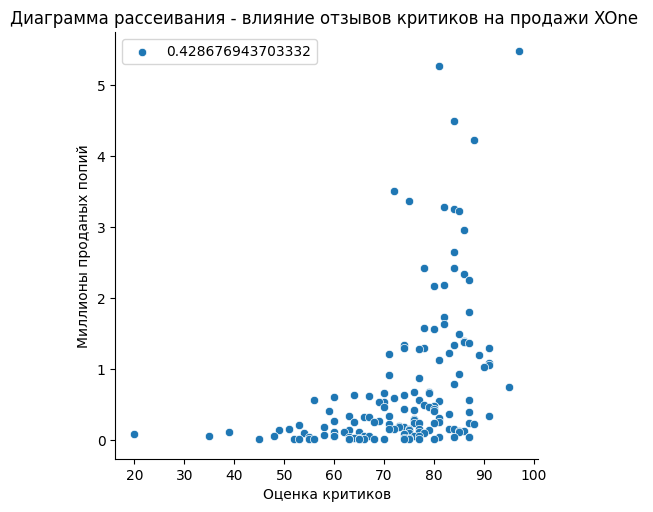

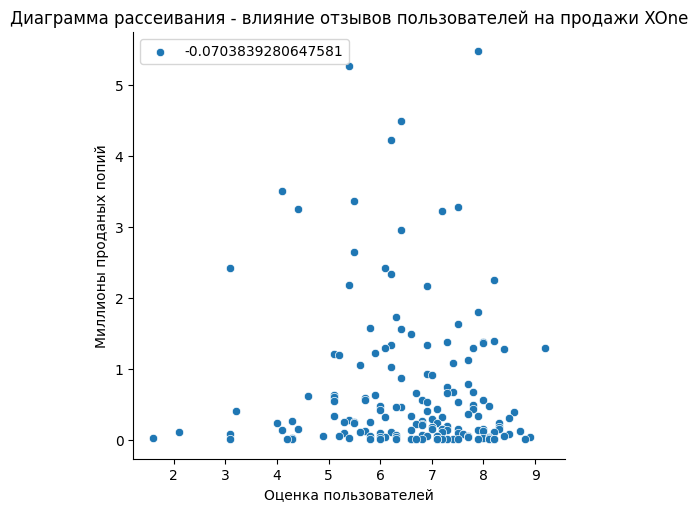

In [38]:
sns.relplot(xone, x='critic_score', y='sum_sales')
plt.legend(labels=[critic_corr])
plt.xlabel('Оценка критиков')
plt.ylabel('Миллионы проданых попий')
plt.title('Диаграмма рассеивания - влияние отзывов критиков на продажи XOne ');

sns.relplot(xone, x='user_score', y='sum_sales')
plt.legend(labels=[user_corr])
plt.xlabel('Оценка пользователей')
plt.ylabel('Миллионы проданых попий')
plt.title('Диаграмма рассеивания - влияние отзывов пользователей на продажи XOne');

<div style="border:solid green 2px; padding: 20px">

**Комментарий:** наблюдаем: так же как и с платформой `PS4` положительное влияние отзывов критиков на продажи, `коэффициэнт корреляции` чуть выше, что касаемо влияния отзывов пользователей обратный эффект за исключением некоторых выбросов, как и с платформой `PS4` `коэффициэнт корреляции` отрицательный` и еще немного больше сдвинут в `отрицательную сторону`.

### Соотнесем выводы о продажами игр с платформой 3DS

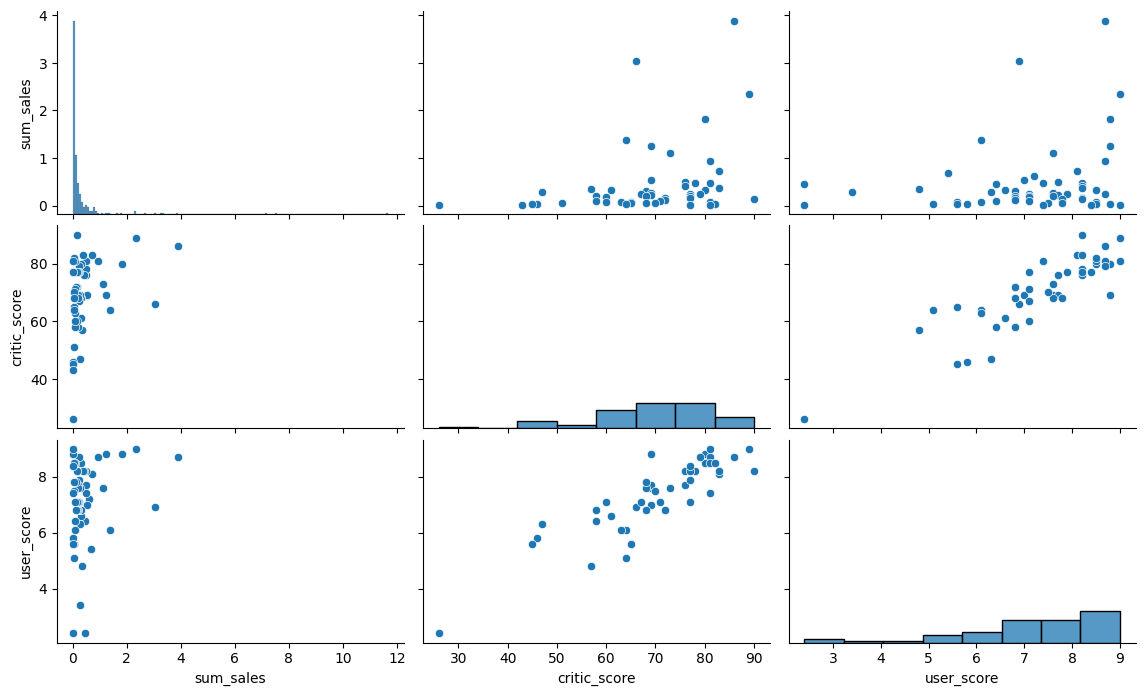

In [39]:
ds_3 = actual[actual['platform'] == '3DS']

sns.pairplot(ds_3[['sum_sales', 'critic_score', 'user_score']])
plt.gcf().set_size_inches(12,7);

In [40]:
critic_corr = ds_3.critic_score.corr(ds_3.sum_sales)
user_corr = ds_3.user_score.corr(ds_3.sum_sales)

/opt/anaconda3/envs/practicum/lib/python3.9/site-packages/pandas/plotting/_matplotlib/core.py:1041: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


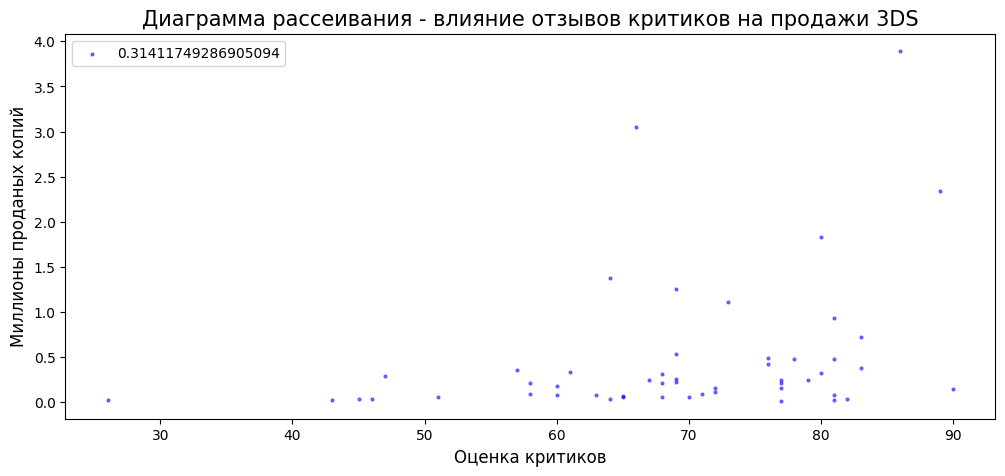

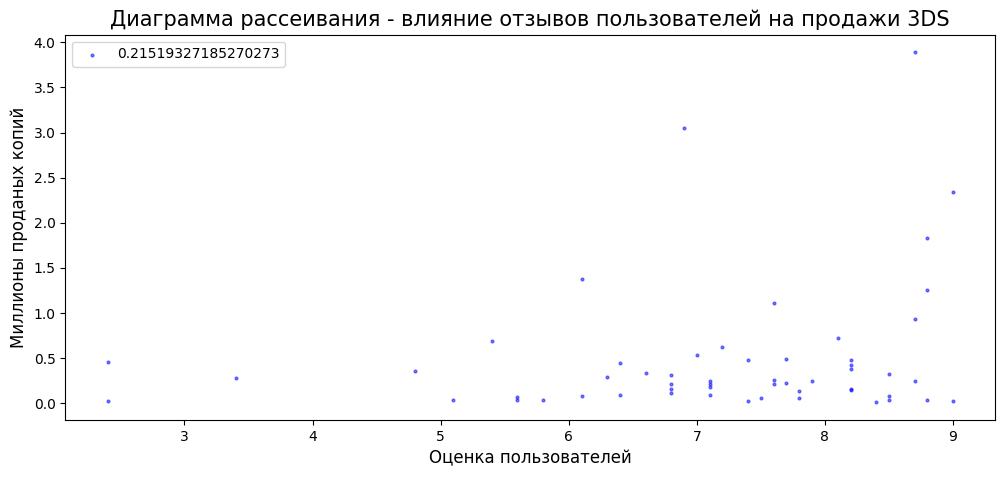

In [41]:
ds_3.plot(kind='scatter', y='sum_sales' , x='critic_score', alpha=0.5,\
         subplots=True, figsize=(12,5), c = 'b', s = 4)
plt.legend(labels=[critic_corr])
plt.title('Диаграмма рассеивания - влияние отзывов критиков на продажи 3DS', fontsize = 15);
plt.xlabel('Оценка критиков', fontsize = 12)
plt.ylabel('Миллионы проданых копий', fontsize = 12);

ds_3.plot(kind='scatter', y='sum_sales' , x='user_score', alpha=0.5,\
         subplots=True, figsize=(12,5), c = 'b', s = 4)
plt.legend(labels=[user_corr])
plt.title('Диаграмма рассеивания - влияние отзывов пользователей на продажи 3DS', fontsize = 15);
plt.xlabel('Оценка пользователей', fontsize = 12)
plt.ylabel('Миллионы проданых копий', fontsize = 12);

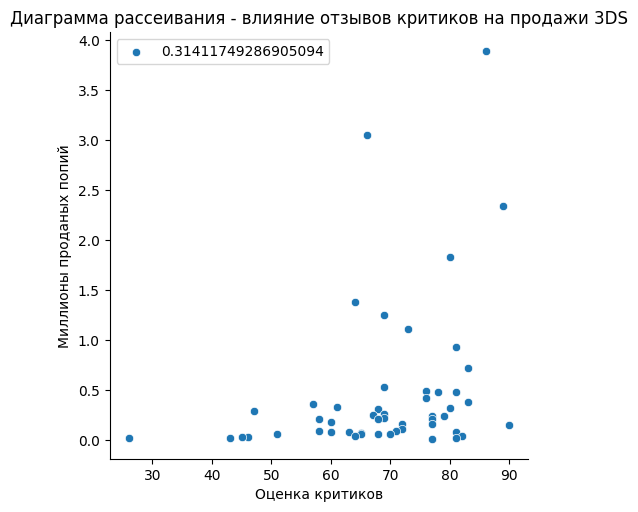

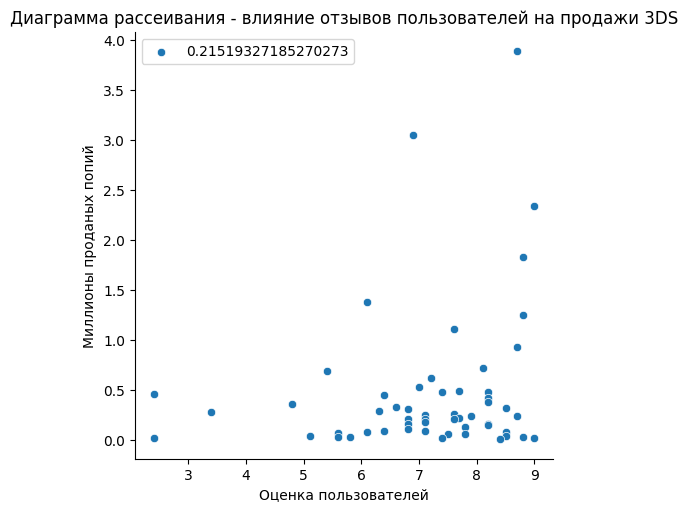

In [42]:
sns.relplot(ds_3, x='critic_score', y='sum_sales')
plt.legend(labels=[critic_corr])
plt.xlabel('Оценка критиков')
plt.ylabel('Миллионы проданых попий')
plt.title('Диаграмма рассеивания - влияние отзывов критиков на продажи 3DS');

sns.relplot(ds_3, x='user_score', y='sum_sales')
plt.legend(labels=[user_corr])
plt.xlabel('Оценка пользователей')
plt.ylabel('Миллионы проданых попий')
plt.title('Диаграмма рассеивания - влияние отзывов пользователей на продажи 3DS');

<div style="border:solid green 2px; padding: 20px">

**Комментарий:** эффект от отзывов критиков также положителен как и с PS4, хоть немного и слабее, а вот отзывы пользователей на эту платформу имеют другой эффект. В отличии от PS4 и XOne на продажу игр платформы 3DS отзывы пользователей влияют положительно, что заметно по графикам и по коэффициэнту рорреляции, он ушел в положительную сторону и значительно.

### Посмотрим на общее распределение игр по жанрам

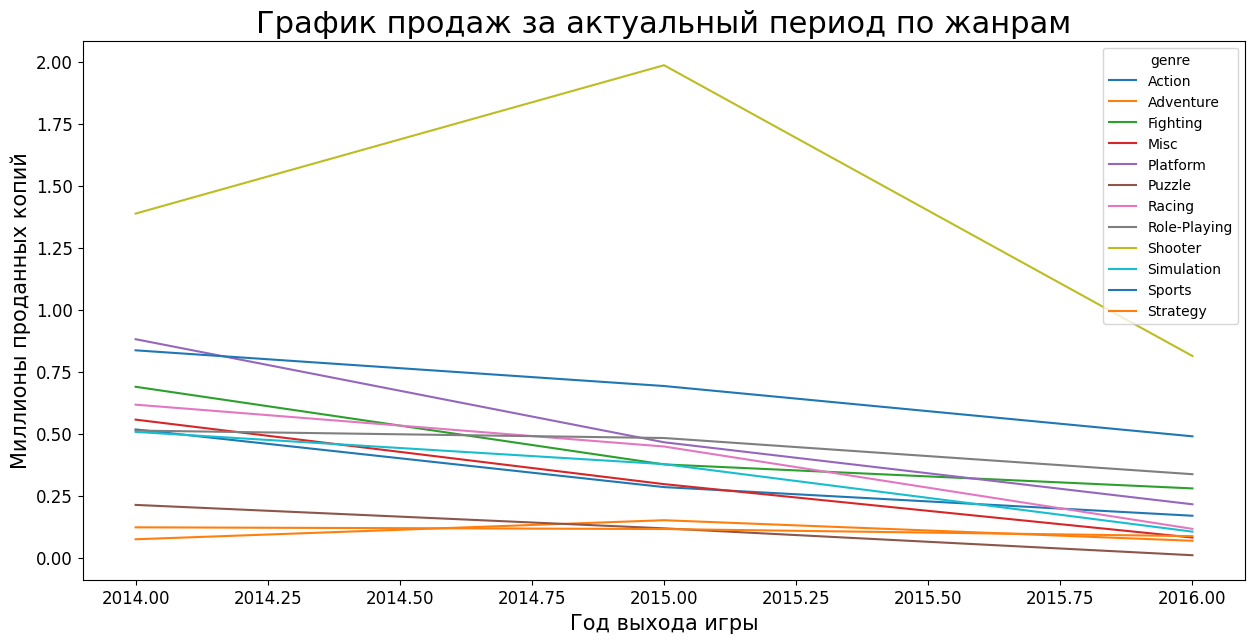

In [43]:
actual.pivot_table(index='year_of_release', columns='genre', values='sum_sales', aggfunc='mean')\
      .plot(figsize=(15, 7), fontsize = 12)

plt.xlabel('Год выхода игры', fontsize = 15)
plt.ylabel('Миллионы проданных копий', fontsize = 15)
plt.title('График продаж за актуальный период по жанрам', fontsize = 22);

<div style="border:solid green 2px; padding: 20px">

**Комментарий:** самый прибыльный жанр `Shooter ("стрелялка")` в пике его средние продажи составляли порядка `2х миллионов копий` в начале 2015 года. Сдующие по популярности жанры `Action ("действие" или боевик)` и `Platform ("платформер")` в начале 2014 года их средние показатели по продажам совпадали более 800та тысяч копий каждый. Как мы видим в исследуемом нами периоде плавное падение средних продаж по всем жанрам, кроме самого популярного. У него был скачок вверх к 2015 году, а затем только резкое падение в средних продажах.

## Составим портрет пользователя каждого региона

### Самые популярные платформы (топ-5)

,Миллионы проданых копий в Северной Америке
Игровые платформы,
PS4,98.61
XOne,81.27
X360,28.30
3DS,22.64
PS3,22.05


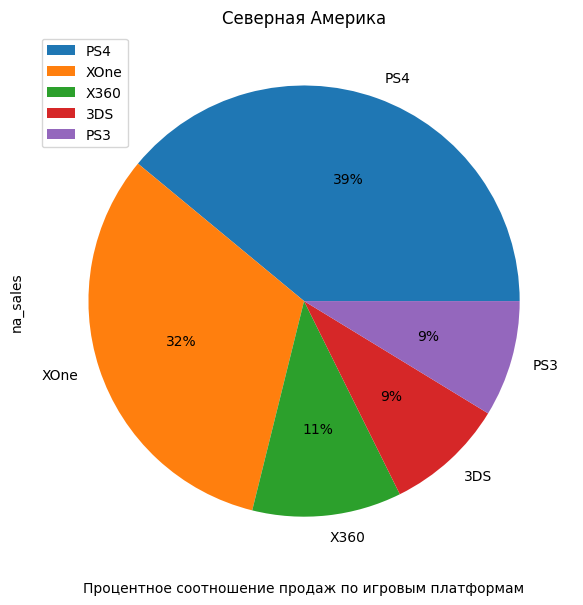

In [44]:
na_top_5 = actual.groupby('platform').agg({'na_sales': 'sum'}).sort_values(by='na_sales', ascending=False).head(5)

na_top_5.plot(kind='pie', y='na_sales', figsize=(7,7), autopct='%1.0f%%', title='Северная Америка')
plt.xlabel('Процентное соотношение продаж по игровым платформам')

na_top_5.columns = ['Миллионы проданых копий в Северной Америке']
na_top_5.index.names = ['Игровые платформы']

na_top_5

<div style="border:solid green 2px; padding: 20px">

**Комментарий:** самая популярная игровая платформа `PS4` `39%` (процентов) доли рынка из `топ 5ти` платформ, `XOne` мене популярна на `7%` (процентов). Остальные платформы не так популярны `PS3 и 3DS` по 9% (процентов), платформа `X360` `11%` (процентов) доли рынка.

,Миллионы проданых копий в Европе
Игровые платформы,
PS4,130.04
XOne,46.25
PS3,25.54
PC,17.97
3DS,16.12


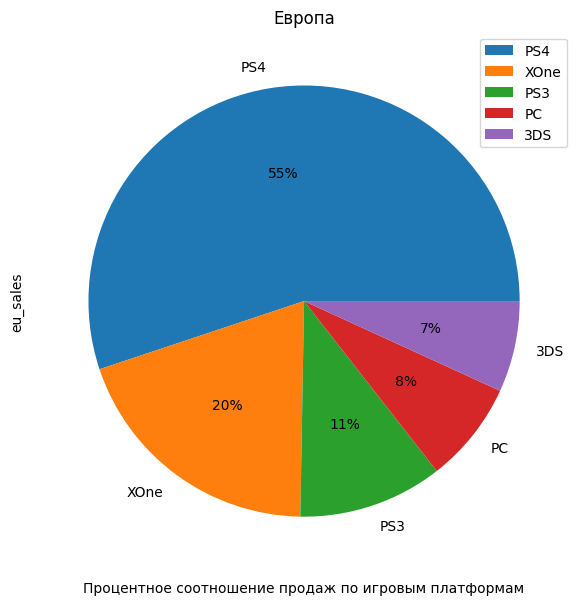

In [45]:
eu_top_5 = actual.groupby('platform').agg({'eu_sales': 'sum'}).sort_values(by='eu_sales', ascending=False).head(5)

eu_top_5.plot(kind='pie', y='eu_sales', figsize=(7,7), autopct='%1.0f%%', title='Европа')
plt.xlabel('Процентное соотношение продаж по игровым платформам')

eu_top_5.columns = ['Миллионы проданых копий в Европе']
eu_top_5.index.names = ['Игровые платформы']

eu_top_5

<div style="border:solid green 2px; padding: 20px">

**Комментарий:**  в `Европе` `PS4` тоже является самой популярной платформой но с большей долей рынка из топ 5ти платформ и охватывает `55%` (процентов) от рынка, далее `XOne c 20%` (процентами) от доли рынка и `PS3, PC и 3DS` с `11%, 8% и 7%` (процентов) соответсвенно.

,Миллионы проданых копий в Японии
Игровые платформы,
3DS,44.24
PS4,15.02
PSV,14.54
PS3,11.22
WiiU,7.31


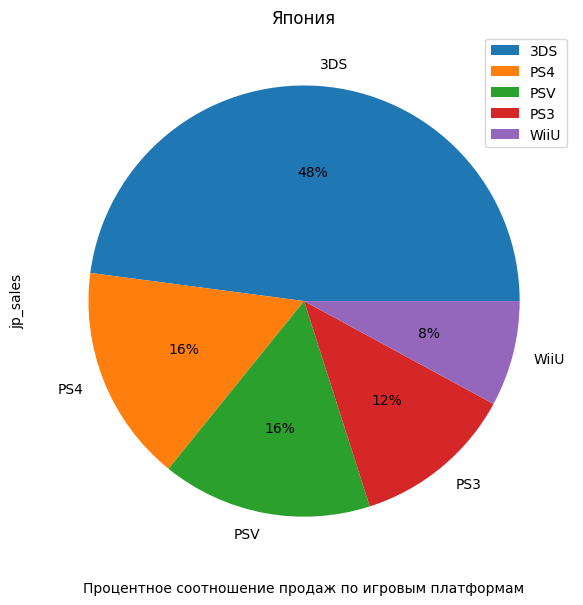

In [46]:
jp_top_5 = actual.groupby('platform').agg({'jp_sales': 'sum'}).sort_values(by='jp_sales', ascending=False).head(5)

jp_top_5.plot(kind='pie', y='jp_sales', figsize=(7,7), autopct='%1.0f%%', title='Япония')
plt.xlabel('Процентное соотношение продаж по игровым платформам')

jp_top_5.columns = ['Миллионы проданых копий в Японии']
jp_top_5.index.names = ['Игровые платформы']

jp_top_5

<div style="border:solid green 2px; padding: 20px">

**Коментарии:** в `Японии` первое место с большим перевесом занимает игровая платформа `3DS` `48%` (процентов) долей рынка из `топ 5ти платформ`, популярная в Европе  `PS4` всего 16% (процентов) так же как и `PSV`. Платформы `PS3 и WiiU 12% и 8%` (процентов) соответственно.

In [47]:
top_5 = na_top_5.join(eu_top_5, how='outer')\
                .join(jp_top_5, how='outer')
top_5.columns = ['Северная Америка', 'Европа', 'Япония']

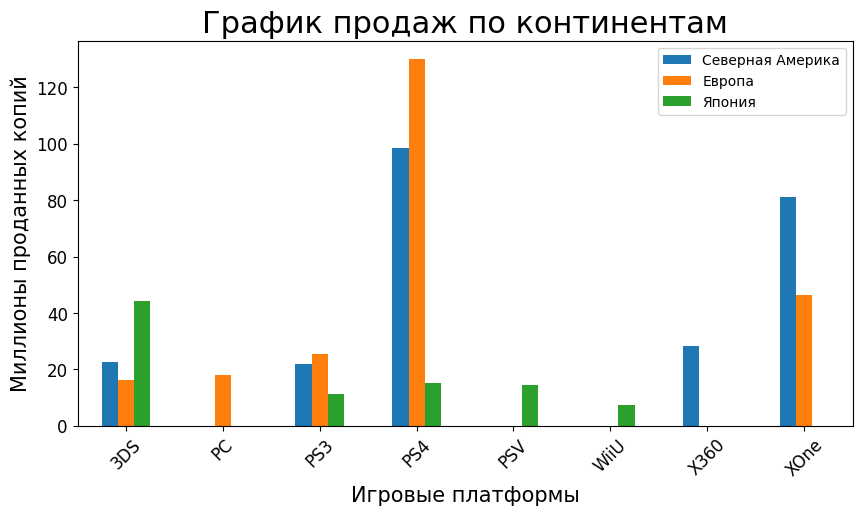

In [48]:
top_5.plot(kind='bar', rot=45, fontsize = 12, figsize=(10, 5))

plt.title('График продаж по континентам', fontsize = 22)
plt.xlabel('Игровые платформы', fontsize = 15)
plt.ylabel('Миллионы проданных копий', fontsize = 15);


<div style="border:solid green 2px; padding: 20px">

**Коментарии:** платформа `PS4` в `Европе` и в `Северной Америке` имеют сомое большое количество продаж по играм, порядка 130ти миллионов и 100 миллионов копий за исследуемый период соответсвенно. Платформы `PSV и WiiU` хоть и имеют небольшую долю рынка, но все же присутствуют в топ `5ти платформ` только в `Японии`, платформы `Х360 и XOne` не входят в эту `5ку`.

### Самые популярные жанры (топ-5)

,Миллионы проданых копий в Северной Америке
Жанр,
Shooter,79.02
Action,72.53
Sports,46.13
Role-Playing,33.47
Misc,15.05


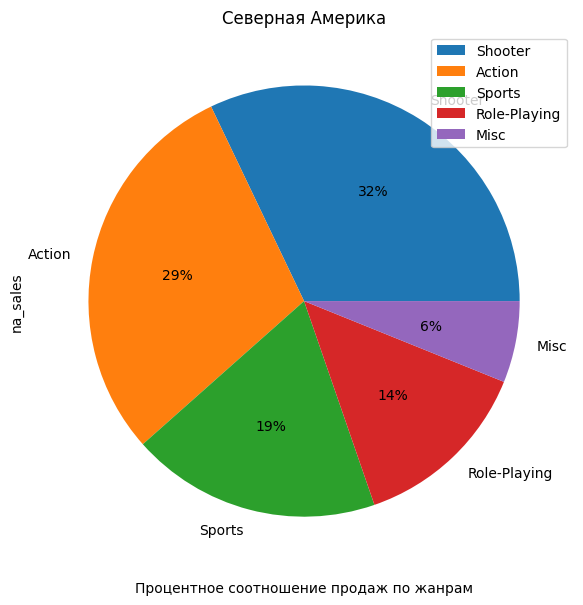

In [49]:
na_genre_top_5 = actual.groupby('genre').agg({'na_sales': 'sum'})\
                     .sort_values(by='na_sales', ascending=False).head(5)

na_genre_top_5.plot(kind='pie', y='na_sales', figsize=(7,7), autopct='%1.0f%%', title='Северная Америка')
plt.xlabel('Процентное соотношение продаж по жанрам')

na_genre_top_5.columns = ['Миллионы проданых копий в Северной Америке']
na_genre_top_5.index.names = ['Жанр']

na_genre_top_5

<div style="border:solid green 2px; padding: 20px">

**Коментарии:** жанры `Shooter` и `Action` занимают основную долю рынка из `топ 5ти` жанров `32%` и `29%` (процентов) соответсвенно. Жанры `Sport, Role-Playing и Misc` имеют `19%, 14% и 6%` (процентов) долей рынка соответсвенно.

,Миллионы проданых копий в Европе
Жанр,
Action,74.68
Shooter,65.52
Sports,45.73
Role-Playing,28.17
Racing,14.13


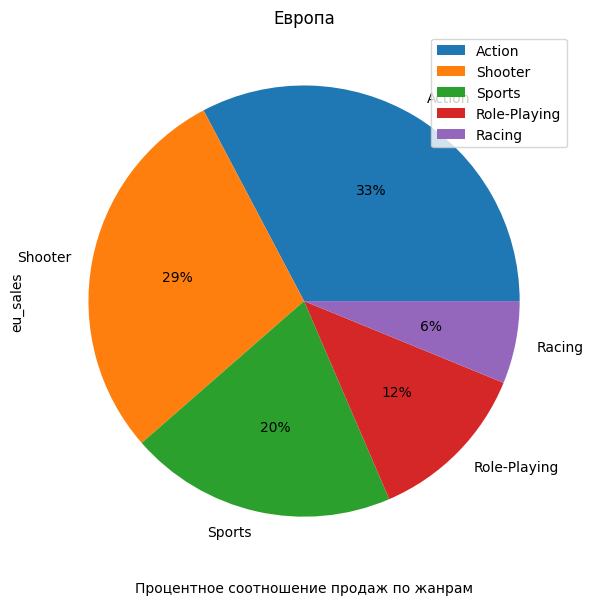

In [50]:
eu_genre_top_5 = actual.groupby('genre').agg({'eu_sales': 'sum'}).sort_values(by='eu_sales', ascending=False).head(5)

eu_genre_top_5.plot(kind='pie', y='eu_sales', figsize=(7,7), autopct='%1.0f%%', title='Европа')
plt.xlabel('Процентное соотношение продаж по жанрам')

eu_genre_top_5.columns = ['Миллионы проданых копий в Европе']
eu_genre_top_5.index.names = ['Жанр']

eu_genre_top_5

<div style="border:solid green 2px; padding: 20px">

**Коментарии:** в `Европе` та же последовательность как и в `Северной Америке` `Shooter, Action, Sport и Role-Playing 33%, 29%, 20% и 12%` (процентов) долей рынка из `топ 5ти` жанров соответственно. Вместо жанра `Misc`, жанр `Rasing c 6%` (процентами).

,Миллионы проданых копий в Японии
Жанр,
Role-Playing,31.16
Action,29.58
Fighting,6.37
Misc,5.61
Shooter,4.87


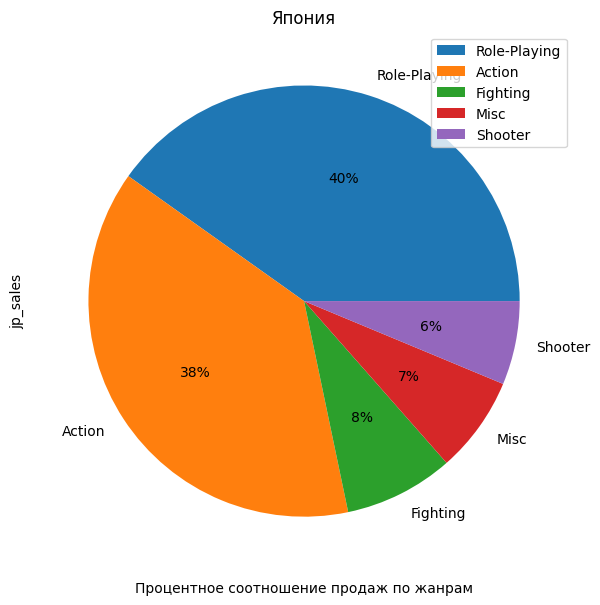

In [51]:
jp_genre_top_5 = actual.groupby('genre').agg({'jp_sales': 'sum'}).sort_values(by='jp_sales', ascending=False).head(5)

jp_genre_top_5.plot(kind='pie', y='jp_sales', figsize=(7,7), autopct='%1.0f%%', title='Япония')
plt.xlabel('Процентное соотношение продаж по жанрам')

jp_genre_top_5.columns = ['Миллионы проданых копий в Японии']
jp_genre_top_5.index.names = ['Жанр']

jp_genre_top_5

<div style="border:solid green 2px; padding: 20px">

**Коментарии:** в `Японии` как и с игровыми платформами другая ситуация, самый популярный жанр в `Европе` и `Северной Америке` `Shoter` занимает из `топ 5ти жанров` последнее место с долей рынка всего в `6%` (процентов). На этих островах первое место занимает жанр `Role-Playing с 40%` (процентами) долей рынка, второе место как и на других континентах жанр `Action` c 38% (процентами). Далее жанры `Fighting и Misc` с долями рынка `8% и 7%` (процентов) соответсвенно.

In [52]:
genre_top_5 = na_genre_top_5.join(eu_genre_top_5, how='outer')\
                            .join(jp_genre_top_5, how='outer')
genre_top_5.columns = ['Северная Америка', 'Европа', 'Япония']

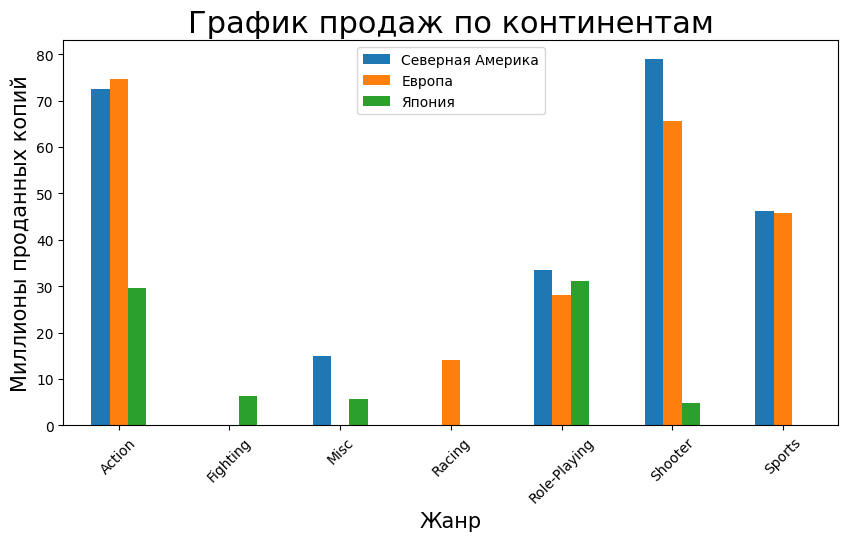

In [53]:
genre_top_5.plot(kind='bar', rot=45, fontsize = 10, figsize=(10, 5))

#plt.xticks(rotation=45) # есть аргумент rotation
plt.title('График продаж по континентам', fontsize = 22)
plt.xlabel('Жанр', fontsize = 15)
plt.ylabel('Миллионы проданных копий', fontsize = 15);

<div style="border:solid green 2px; padding: 20px">

**Коментарии:** жанр Racing популярен только в Европе, а жанр Fighting исключительно в `Японии`. Жанр `Sport` в `Японии` не пользуются спросом, как жанр Misc в Европе

### Проверим влияет ли рейтинг ESRB на продажи в отдельном регионе

,Миллионы проданых копий в Северной Америке
Категория,
M,96.42
Unknown,64.72
E,50.74
T,38.95
E10+,33.23


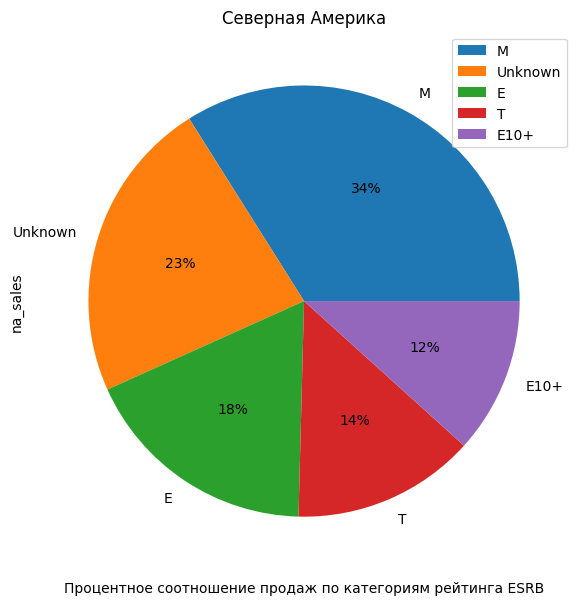

In [54]:
na_esrb = actual.groupby('rating').agg({'na_sales': 'sum'}).sort_values(by='na_sales', ascending=False)

na_esrb.plot(kind='pie', y='na_sales', figsize=(7,7), autopct='%1.0f%%', title='Северная Америка')
plt.xlabel('Процентное соотношение продаж по категориям рейтинга ESRB')

na_esrb.columns = ['Миллионы проданых копий в Северной Америке']
na_esrb.index.names = ['Категория']

na_esrb

<div style="border:solid green 2px; padding: 20px">

**Коментарии:** `классифицированные` игры: `34%` (процентов) продаж на рынке занимают игры категория `М` (для лиц сташе 17 лет), далее с `18%` (процента) категория `E`(для всех возрастных групп). Категории `T` (для лиц старше 13 лет) и `E10+` (для лиц старше 10 лет) `14% и 12%` (процентов) доли рынка соответсвенно. Игр с `неопределнной категорией` по `классификации` `Unknown` занимают 23% (процента) долей рынка.

,Миллионы проданых копий в Европе
Категория,
M,93.44
Unknown,58.95
E,58.06
T,34.07
E10+,26.16


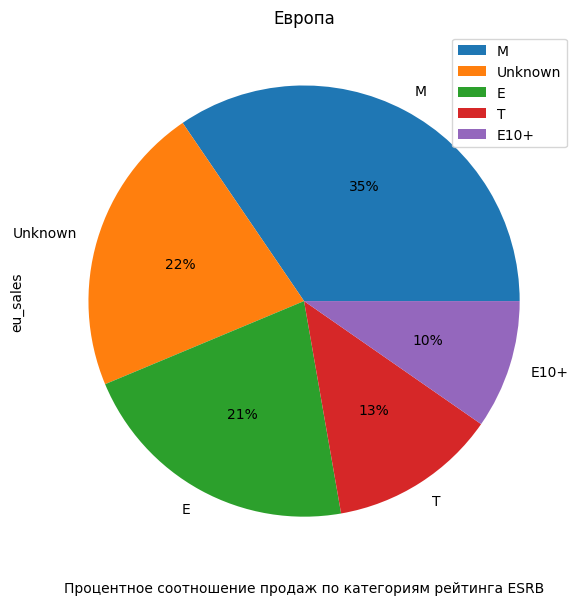

In [55]:
eu_esrb = actual.groupby('rating').agg({'eu_sales': 'sum'}).sort_values(by='eu_sales', ascending=False)

eu_esrb.plot(kind='pie', y='eu_sales', figsize=(7,7), autopct='%1.0f%%', title='Европа')
plt.xlabel('Процентное соотношение продаж по категориям рейтинга ESRB')

eu_esrb.columns = ['Миллионы проданых копий в Европе']
eu_esrb.index.names = ['Категория']

eu_esrb

<div style="border:solid green 2px; padding: 20px">

**Коментарии:** так же как и в `Северной Америке` на рынке `Европы` из `классифицированных` игр лидируют по продажам игры категории `М` (для лиц сташе 17 лет)  `35%` (процентов), категория `E` (для всех возрастных групп) подрасла на `3%` (процента) и составляет `21%` (процентов) продаж от рынка. Категории `T` (для лиц старше 13 лет) и `E10+` (для лиц старше 10 лет) имеют по `13% и 10%` (процентов) доли рынка соответсвенно. Игры с `неопределнной категорией по классификации` `Unknown` занимают 22% (процента) долей рынка.

,Миллионы проданых копий в Японии
Категория,
Unknown,56.90
T,14.78
E,8.94
M,8.01
E10+,4.46


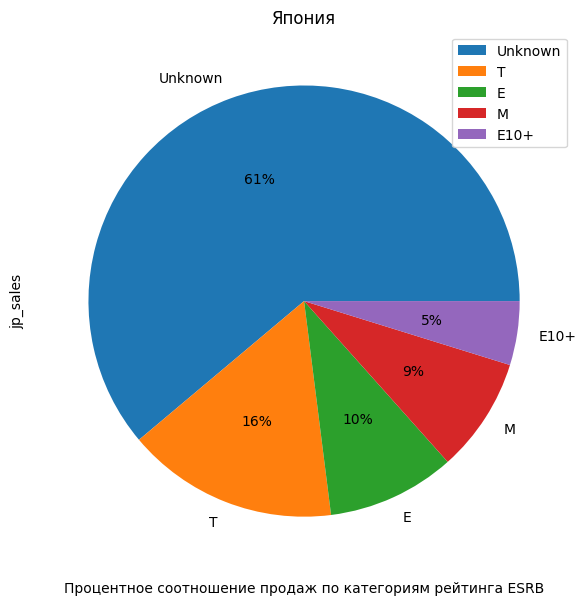

In [56]:
jp_esrb = actual.groupby('rating').agg({'jp_sales': 'sum'}).sort_values(by='jp_sales', ascending=False)

jp_esrb.plot(kind='pie', y='jp_sales', figsize=(7,7), autopct='%1.0f%%', title='Япония')
plt.xlabel('Процентное соотношение продаж по категориям рейтинга ESRB')

jp_esrb.columns = ['Миллионы проданых копий в Японии']
jp_esrb.index.names = ['Категория']

jp_esrb

<div style="border:solid green 2px; padding: 20px">

**Коментарии:** т.к. система классификации `ESRB` изначально `Северо-Американская`, в `Японии` очень много игр `Unknown` `не классифицированных по ней`, что составляет 61% (процент) игр на рынке. Из классифицированных игр `перво место` по продажам на рынке занимает категория `T` (для лиц старше 13 лет) с долей рынка `16%` (процент), на `втором месте` категория `E` (для всех возрастных групп) с `10%` (процентами) долей рынка. `9%` (процентов) занимает категория `М` (для лиц сташе 17 лет), и категория `E10+` (для лиц старше 10 лет) всего `5%` (процентов).

In [57]:
esrb = na_esrb.join(eu_esrb, how='outer')\
                   .join(jp_esrb, how='outer')
esrb.columns = ['Северная Америка', 'Европа', 'Япония']

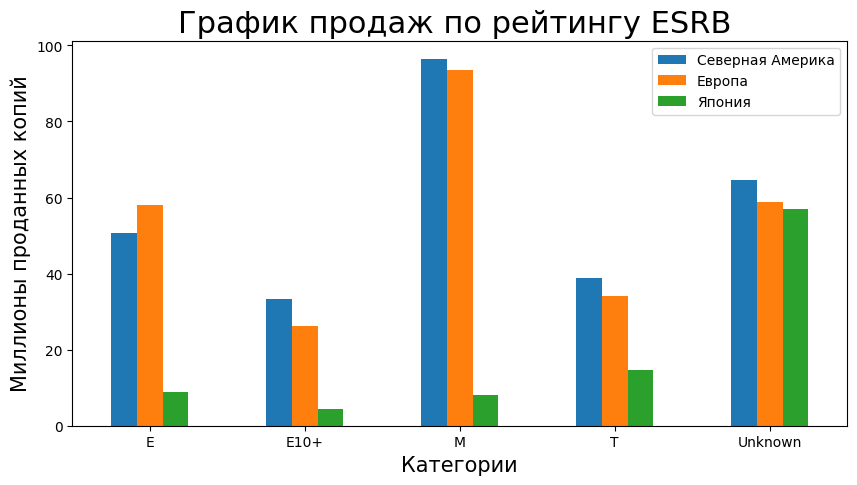

In [58]:
esrb.plot(kind='bar', rot=360, fontsize = 10, figsize=(10, 5))

plt.title('График продаж по рейтингу ESRB ', fontsize = 22)
plt.xlabel('Категории', fontsize = 15)
plt.ylabel('Миллионы проданных копий', fontsize = 15);

<div style="border:solid green 2px; padding: 20px">

**Коментарии:** значительное преобладание на рынке игр категории `М` (для лиц сташе 17 лет), чуть мене `100а миллионов` проданных копий за исследуемый период в `Северной Америке` и `Европе`. Далее сильно уступает в продажах категория игр `E` (для всех возрастных групп) чуть около `60ти миллионов` копий в `Европе` и `50ти миллионов` в `Северной Америке`. Игры с неопределенной категорией по классификации занамают достаточно большую часть продаж, с небольшим возростанием от `60ти миллионов` экземпляров в `Японии` до `65и миллионов` экземпляров в `Северной Америке`.

## Проверим гипотезы

### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

**Формулировка гипотез:**

H0: Средний пользовательский рейтинг платфоры Xbox One равен среднему пользовательскому рейтингу платформы PC

H1: Средний пользовательский рейтинг платфоры Xbox One не равен среднему пользовательскому рейтингу платформы PC

In [59]:
xbox_one = actual[(actual['platform'] == 'XOne') & (~actual['user_score'].isna())]['user_score']
pc = actual[(actual['platform'] == 'PC') & (~actual['user_score'].isna())]['user_score']

alpha = .05

res = st.ttest_ind(xbox_one, pc, equal_var=False)

print(res.pvalue) 

if res.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

0.11601398086668832
Не получилось отвергнуть нулевую гипотезу


<div style="border:solid green 2px; padding: 20px">

**Комментарий:** нулевая гипотеза подтвердилась.

### Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

**Формулировка гипотез:**

H0: Средний пользовательский рейтинг жанра Action равен среднему пользовательскому рейтингу жанра Sports

H1: Средний пользовательский рейтинг жанра Action не равен среднему пользовательскому рейтингу жанра Sports

In [60]:
action = actual[(actual['genre'] == 'Action') & (~actual['user_score'].isna())]['user_score']
sports = actual[(actual['genre'] == 'Sports') & (~actual['user_score'].isna())]['user_score']

alpha = .05

res = st.ttest_ind(action, sports, equal_var=False)

print(res.pvalue) 

if res.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

1.1825550382644557e-14
Отвергаем нулевую гипотезу


<div style="border:solid green 2px; padding: 20px">

**Комментарий:** подтвердилась альтернативная гипотеза.

## Общий вывод

1. - С `1980 до 1993` годы выпускалось менее чем `50` игр за год, а порои и менее `20ти игр. В `1993` году выпустили `60` игр и далее начиная с `1994` года, в этот го вышло более `120` игр, начался резкий рост выпуска игр в год. 
   - Пик пришелся с `2006 года по 2011 год` выпускалось более `1000ти` игр, а в `2008 и 2009` годах более `1400` игр за год.
   - С `2012` резкий спад выпусков игр в `2` раза. Можно предположить, игры стали более объемные, требующие для создание больше времени и человеческих ресурсов, производители стали делать упор на качество игры и хорошую графику.


2. - В основном игровые платформы существуют порядка `7ми` лет, но есть и гранды такие как `PS2, Wii, GBA или X360` существующие более `10ти`. Такие платформы как `PS2 и Wii` в лучшее годы достигали пика продаж более `200т` миллионов копий игр в год. 
   - Но есть и исключения: платформа `PC` существует более `20ти` лет, хотя даже в пике продажи игр не превышали `50ти` миллионов копий в год.


3. Выбрали актуальны период для дальнейшего исследования за последние `2.5 года с 2014 по 2016 годы`, выявили:
   - Продажи игр в интернет-магазине «Стримчик» после `2015` года резко `падают` по всем показателям, скорее всего это связано с тем, что игровые платформы все больше уходят с прямыми продажами в интернет и постепенно прекращают выпуск игр на CD-дисках и других носителях.


4. - Оценки критиков положительно влияют на продажи игр, соответсвенно чем выше оценка, тем больше продажи. Оценки пользователей практически не влияют на продажи игр по графикам общих продаж.
   - Но сравнив 3и топовых и перспективных платформы `PS4, XOne и 3DS` мы заметили изменения:
     - Действительно на самую перспективную платформу `PS4` и вторую по значимости `XOne` отзывы пользователей практически не влияют за некоторыми выбросами и имеют небольшие отрицательные `коэффициенты корреляции -0.040131589472697266 и -0.0703839280647581` соответсвенно.
     - Что касаемо платформы `3DS`, влияние отзывов пользователей на продажи игр платформы положительно, это и хорошо заметно по положительному `коэффициенту корреляции 0.21519327185270273`.

5. - Выявили самый популярный жанр в исследовательском периоде это жанр `Shooter`, его средний показатель по продажам в пиковый период на начало `2015` года превышал показатели остальных жанров более чем на `один миллион` экземпляров. 


6. Составили портрет пользователя по регионам:
   - Топ 5ть игровых платформ:
     - в Северной Америке: 
     PS4 - 39%, XOne - 32%, X360 - 11%, PS3 и 3DS - 9% (процентов).
     - в Европе: 
     PS4 - 55%, XOne - 20%, PS3 - 11%, PC - 8% и 3DS - 7% (процентов).
     - в Японии: 
     3DS - 48%, PSV и PS4 - 16%, PS3 - 12% и WiiU - 8% (процентов).
   - Топ 5ть жанров:
     - в Северной Америке: 
     Shooter - 32%, Action - 29%, Sport - 19%, Role-Playing - 14% и Misc - 6% (процентов).
     - в Европе: 
     Shooter - 33%, Action - 29%, Sport - 20%, Role-Playing - 12% и Rasing - 6% (процентов).
     - в Японии: 
     Role-Playing - 40%, Action - 38%, Fighting - 8%, Misc - 7% и Shooter - 6% (процентов).
   - По рейтингу ESRB:
     - в Северной Америке:
     М (для лиц сташе 17 лет) - 34%, Unknown (без категории/не классифицированные) - 23%, E (для всех возрастных групп) - 18%, T (для лиц старше 13 лет) - 14% и E10+ (для лиц старше 10 лет) 12% (процентов).
     - в Европе: 
     М (для лиц сташе 17 лет) - 35%, Unknown (без категории/не классифицированные) - 22%, E (для всех возрастных групп) - 21%, T (для лиц старше 13 лет) - 13% и E10+ (для лиц старше 10 лет) - 10% (процентов).
     - в Японии: 
     Unknown (без категории/не классифицированные) - 61%, T (для лиц старше 13 лет) - 16%, E (для всех возрастных групп) - 10%, М (для лиц сташе 17 лет) - 9% и E10+ (для лиц старше 10 лет) - 5% (процентов).


7. Гипотезы о том, что:

- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые
- Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные

  Обе гипотезы подтвердились.
  
  
P.S. С развитием прямых интернет продаж от игровых платформ Магазину «Стримчик» придется в скором времени закрыться или менять профориентацию.